In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
book = pd.read_csv("Books.csv")
rat = pd.read_csv("Ratings.csv") 
user = pd.read_csv("Users.csv")

C:\Users\dipan\AppData\Local\Temp\ipykernel_19356\490005007.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("Books.csv")


In [3]:
print(book.shape,
rat.shape,
user.shape)

(271360, 8) (1149780, 3) (278858, 3)


In [4]:
print(book.isnull().sum(),'\n','\n',rat.isnull().sum(),'\n','\n',user.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 
 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 
 
 User-ID          0
Location         0
Age         110762
dtype: int64


In [5]:
print(book.duplicated().sum(),'\n','\n',rat.duplicated().sum(),'\n','\n',user.duplicated().sum())

0 
 
 0 
 
 0


In [6]:
print(book.columns,"\n",rat.columns,"\n",user.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [7]:
# plt.scatter(user['User-ID'],user['Location'])

In [8]:
len(user['Age'].unique().tolist())

166

In [9]:
user['Age'].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
220.0       1
143.0       1
140.0       1
189.0       1
127.0       1
Name: count, Length: 165, dtype: int64

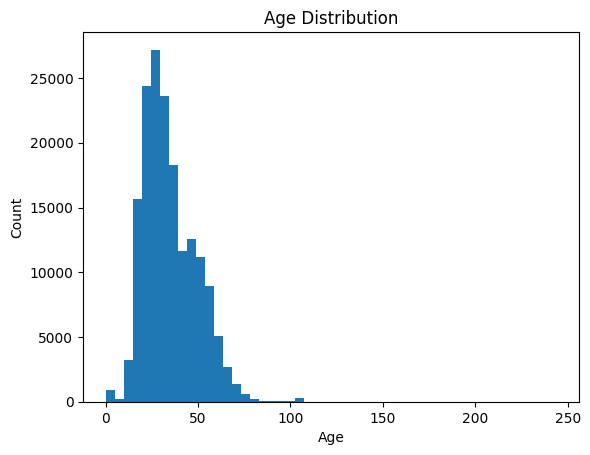

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(user['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [11]:
# plt.figure()
# plt.hist(rat['ISBN'], bins=50)
# plt.xlabel('ISBM')
# plt.ylabel('Count')
# plt.title('ISBM Distribution')
# plt.show()


In [12]:
book.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [13]:
rat.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [14]:
rating_with_name = rat.merge(book,on='ISBN')

In [15]:
rating_with_name.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [16]:
rating_with_name.shape

(1031136, 10)

In [17]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [18]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [19]:
avg_rating_df = rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df
# avg_rating_df = (rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index())
# avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)
# avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [20]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
user.shape

(278858, 3)

In [70]:
popularity_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [71]:
popularity_df = popularity_df[popularity_df['num_ratings'] >= 80].sort_values('avg_ratings',ascending=False)
popularity_df.shape

(1275, 3)

In [24]:
popularity_df = popularity_df.merge(book,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

#### Colaborative Filtering Based Recommandation System

In [87]:
x = rating_with_name.groupby('User-ID').count()['Book-Rating'] > 150
padheLikheUser = x[x].index
len(padheLikheUser)

1115

In [26]:
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(padheLikheUser)]

In [27]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [28]:
final_filter = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)] 

In [29]:
pt = final_filter.pivot_table(
    index='Book-Title',
    columns='User-ID',
    values='Book-Rating',
    aggfunc='mean'
)


In [60]:
pt

User-ID,254,1903,2033,2110,2276,2766,2891,2977,3363,4017,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# list(pt.index)

In [32]:
pt.fillna(0,inplace=True)

In [33]:
pt.shape

(842, 1037)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
similarity_score = cosine_similarity(pt)

In [36]:
similarity_score.shape

(842, 842)

In [55]:
def recommand(book_name) : 
    index = np.where(pt.index == book_name)[0][0] 
    distance = similarity_score[index]
    similarItem = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    data = []
    for i in similarItem: 
        item = []
        # print(pt.index[i[0]])
        temp_df = book[book['Book-Title'] == pt.index[i[0]]] 
        item.append(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.append(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.append(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [56]:
recommand('Message in a Bottle')

[[['A Walk to Remember'],
  ['Nicholas Sparks'],
  ['http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg']],
 [['Nights in Rodanthe'],
  ['Nicholas Sparks'],
  ['http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg']],
 [["River's End"],
  ['Nora Roberts'],
  ['http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg']],
 [['The Mulberry Tree'],
  ['Jude Deveraux'],
  ['http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg']],
 [['The Notebook'],
  ['Nicholas Sparks'],
  ['http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg']]]

In [57]:
recommand('4 Blondes')

[[['Seabiscuit'],
  ['LAURA HILLENBRAND'],
  ['http://images.amazon.com/images/P/0345465083.01.MZZZZZZZ.jpg']],
 [['The Crimson Petal and the White'],
  ['Michel Faber'],
  ['http://images.amazon.com/images/P/015100692X.01.MZZZZZZZ.jpg']],
 [['Pride and Prejudice'],
  ['Jane Austen'],
  ['http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg']],
 [['The House of the Spirits'],
  ['Isabel Allende'],
  ['http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg']],
 [['Bridget Jones: The Edge of Reason'],
  ['Helen Fielding'],
  ['http://images.amazon.com/images/P/0140298479.01.MZZZZZZZ.jpg']]]

In [40]:
popularity_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,249,5.409639
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
30,The Giver (21st Century Reference),LOIS LOWRY,http://images.amazon.com/images/P/0440219078.0...,179,4.916201
32,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,http://images.amazon.com/images/P/0553375407.0...,162,4.907407


In [41]:
import pickle 
# pickle.dump(popularity_df,open("popular.pkl","wb"))

In [58]:
pickle.dump(pt,open("pt.pkl","wb"))
pickle.dump(book,open("book.pkl","wb"))
pickle.dump(similarity_score,open("similarity.pkl","wb"))

In [81]:
book.shape

(271360, 8)

In [83]:
book[book['Book-Title'].str.contains('Never Split', case=False, na=False)]["Book-Title"].tolist()

[]